In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import yfinance as yfin

In [2]:
yfin.pdr_override()
start = '2010-01-01'
end = '2019-01-01'
df = data.get_data_yahoo('AAPL', start=start, end=end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.375172,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.866356,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.620598,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.639877,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.003681,140014000


In [3]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


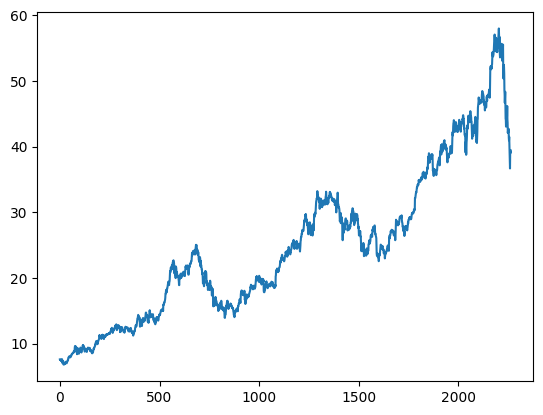

In [5]:
plt.plot(df.Close)

In [6]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2259,37.037498,37.887501,36.647499,36.707500,148676800
2260,37.075001,39.307499,36.680000,39.292500,234330000
2261,38.959999,39.192501,37.517502,39.037498,212468400
2262,39.375000,39.630001,38.637501,39.057499,169165600


In [7]:
ma100= df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    51.285075
2260    51.159525
2261    51.029925
2262    50.897825
2263    50.774400
Name: Close, Length: 2264, dtype: float64

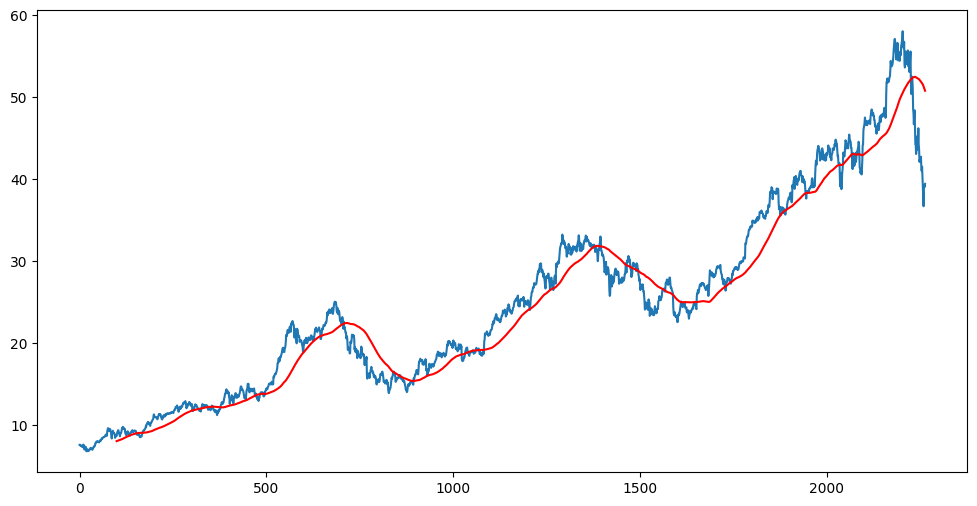

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    48.436525
2260    48.405838
2261    48.376063
2262    48.348300
2263    48.322163
Name: Close, Length: 2264, dtype: float64

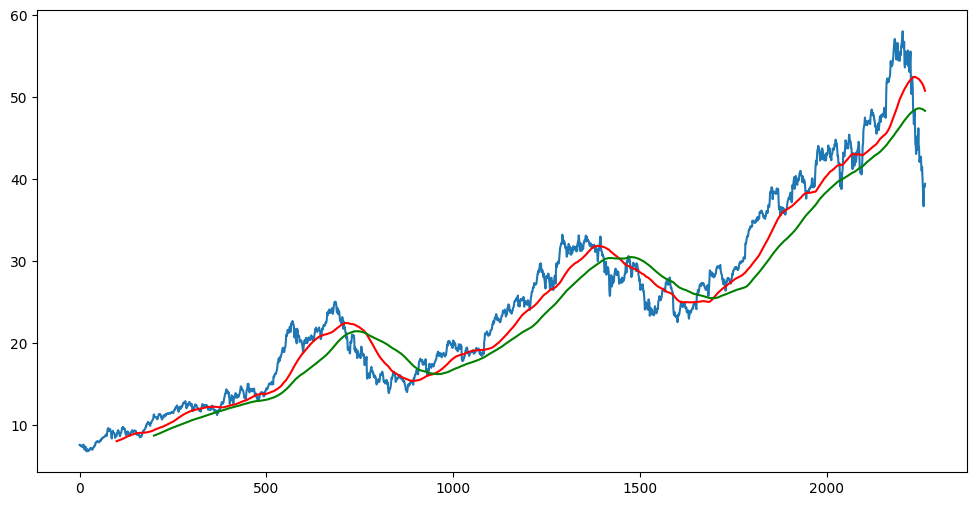

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape


(2264, 5)

In [12]:
#Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1584, 1)
(680, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1584,26.782499
1585,26.492500
1586,26.420000
1587,26.270000
1588,26.087500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range= (0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.78070233],
       [0.7582516 ],
       [0.75285205]])

In [17]:
x_train = []
y_train = []
for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.86529534],
        [0.87022129],
        [0.85553826],
        ...,
        [0.78629138],
        [0.801448  ],
        [0.80201636]],

       [[0.87022129],
        [0.85553826],
        [0.86624261],
        ...,
        [0.801448  ],
        [0.80201636],
        [0.78070233]],

       [[0.85553826],
        [0.86624261],
        [0.85819066],
        ...,
        [0.80201636],
        [0.78070233],
        [0.7582516 ]]])

In [19]:
#ML model
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [20]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                        input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model. add (Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50


2023-05-07 10:02:02.338279: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 7s 108ms/step - loss: 0.0609
Epoch 2/50
47/47 [==============================] - 5s 108ms/step - loss: 0.0119
Epoch 3/50
47/47 [==============================] - 5s 111ms/step - loss: 0.0102
Epoch 4/50
47/47 [==============================] - 5s 111ms/step - loss: 0.0097
Epoch 5/50
47/47 [==============================] - 5s 112ms/step - loss: 0.0083
Epoch 6/50
47/47 [==============================] - 5s 112ms/step - loss: 0.0088
Epoch 7/50
47/47 [==============================] - 5s 112ms/step - loss: 0.0077
Epoch 8/50
47/47 [==============================] - 5s 112ms/step - loss: 0.0077
Epoch 9/50
47/47 [==============================] - 5s 112ms/step - loss: 0.0076
Epoch 10/50
47/47 [==============================] - 5s 111ms/step - loss: 0.0066
Epoch 11/50
47/47 [==============================] - 5s 111ms/step - loss: 0.0069
Epoch 12/50
47/47 [==============================] - 5s 111ms/step - loss: 0.0066
Epoch 13/50
47/47 [=================

In [64]:
model.save('keras_model.h5')

In [65]:
data_testing.head()

,Close
1584,26.782499
1585,26.492500
1586,26.420000
1587,26.270000
1588,26.087500


In [66]:
data_training.tail(100)

,Close
1484,29.719999
1485,29.507500
1486,29.452499
1487,29.575001
1488,29.334999
...,...
1579,28.010000
1580,28.025000
1581,27.462500
1582,26.870001


In [67]:
past_100_days= data_training.tail(100)

In [68]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [69]:
final_df.head()

,Close
0,29.719999
1,29.507500
2,29.452499
3,29.575001
4,29.334999


In [70]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.20136879],
       [0.19537148],
       [0.19381923],
       [0.19727654],
       [0.19050305],
       [0.18302406],
       [0.17540393],
       [0.20242715],
       [0.1971354 ],
       [0.19678265],
       [0.17836735],
       [0.18224794],
       [0.1611515 ],
       [0.15621255],
       [0.14217173],
       [0.14816904],
       [0.13151771],
       [0.11070346],
       [0.11987585],
       [0.11917029],
       [0.1289071 ],
       [0.1248148 ],
       [0.11627744],
       [0.12982431],
       [0.11980528],
       [0.10527062],
       [0.1059056 ],
       [0.08727864],
       [0.07309673],
       [0.04311014],
       [0.04670855],
       [0.05778594],
       [0.06787555],
       [0.04974249],
       [0.06477104],
       [0.047908  ],
       [0.04459188],
       [0.0455091 ],
       [0.04205183],
       [0.07817682],
       [0.06420663],
       [0.06808721],
       [0.02173147],
       [0.02645876],
       [0.04938968],
       [0.04296905],
       [0.02921052],
       [0.042

In [71]:
input_data.shape


(780, 1)

In [72]:
x_test = []
y_test = []
for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [74]:
y_test

array([0.11846468, 0.11028014, 0.10823399, 0.1040006 , 0.09884993,
       0.05277643, 0.03167999, 0.02398928, 0.02328373, 0.03414946,
       0.02716437, 0.02046145, 0.01679253, 0.01728642, 0.02173147,
       0.01531084, 0.        , 0.00127002, 0.02497707, 0.02222537,
       0.02977493, 0.02723489, 0.0344317 , 0.04296905, 0.05334089,
       0.06547665, 0.07105064, 0.07062726, 0.06717   , 0.05729205,
       0.05207087, 0.05348198, 0.0584915 , 0.06131378, 0.06067879,
       0.06568831, 0.05990267, 0.04938968, 0.05023638, 0.04797857,
       0.05087142, 0.03520783, 0.033585  , 0.03930013, 0.03676008,
       0.04064067, 0.02159038, 0.01199467, 0.02293092, 0.02864605,
       0.03711283, 0.03915898, 0.03280887, 0.03661894, 0.03951179,
       0.04473297, 0.04684969, 0.04995415, 0.04607356, 0.05962043,
       0.05954986, 0.06695833, 0.06724057, 0.06787555, 0.06413606,
       0.05870322, 0.04938968, 0.0446624 , 0.08897199, 0.09877936,
       0.09786214, 0.1108446 , 0.0997672 , 0.10901011, 0.10957

In [75]:
# Making Predictions
y_predicted = model.predict(x_test)

22/22 [==============================] - 1s 26ms/step


In [76]:
y_predicted. shape

(680, 1)

In [77]:
y_test


array([0.11846468, 0.11028014, 0.10823399, 0.1040006 , 0.09884993,
       0.05277643, 0.03167999, 0.02398928, 0.02328373, 0.03414946,
       0.02716437, 0.02046145, 0.01679253, 0.01728642, 0.02173147,
       0.01531084, 0.        , 0.00127002, 0.02497707, 0.02222537,
       0.02977493, 0.02723489, 0.0344317 , 0.04296905, 0.05334089,
       0.06547665, 0.07105064, 0.07062726, 0.06717   , 0.05729205,
       0.05207087, 0.05348198, 0.0584915 , 0.06131378, 0.06067879,
       0.06568831, 0.05990267, 0.04938968, 0.05023638, 0.04797857,
       0.05087142, 0.03520783, 0.033585  , 0.03930013, 0.03676008,
       0.04064067, 0.02159038, 0.01199467, 0.02293092, 0.02864605,
       0.03711283, 0.03915898, 0.03280887, 0.03661894, 0.03951179,
       0.04473297, 0.04684969, 0.04995415, 0.04607356, 0.05962043,
       0.05954986, 0.06695833, 0.06724057, 0.06787555, 0.06413606,
       0.05870322, 0.04938968, 0.0446624 , 0.08897199, 0.09877936,
       0.09786214, 0.1108446 , 0.0997672 , 0.10901011, 0.10957

In [78]:
y_predicted

array([[0.18822594],
       [0.18988878],
       [0.1913309 ],
       [0.19251753],
       [0.19342108],
       [0.19401973],
       [0.19425043],
       [0.19405729],
       [0.19338784],
       [0.1922145 ],
       [0.19054985],
       [0.18842319],
       [0.18589646],
       [0.18303713],
       [0.17991725],
       [0.17661574],
       [0.17320776],
       [0.16975398],
       [0.16630709],
       [0.16292661],
       [0.15966868],
       [0.15655741],
       [0.15359819],
       [0.15081176],
       [0.14822532],
       [0.1458685 ],
       [0.14377141],
       [0.14196107],
       [0.14045653],
       [0.13926557],
       [0.13838245],
       [0.1377882 ],
       [0.13745591],
       [0.13735625],
       [0.13746023],
       [0.13773899],
       [0.13815254],
       [0.13867763],
       [0.1392903 ],
       [0.13996214],
       [0.1406647 ],
       [0.14137131],
       [0.14205611],
       [0.1426917 ],
       [0.14325586],
       [0.14373273],
       [0.14410895],
       [0.144

In [79]:
scaler.scale_

array([0.02822267])

In [80]:
scale_factor = 1/0.02822267
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

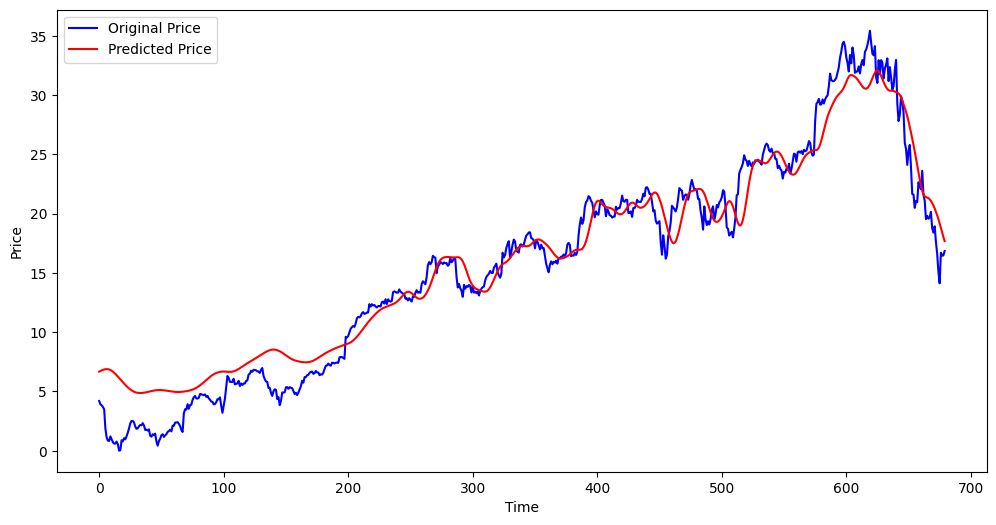

In [81]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot (y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()